In [1]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from Utils import *

# Load the data
training_data = np.load('training_data.npy')
valid_periods = np.load('valid_periods.npy')
categories = np.load('categories.npy')

In [2]:
dataset, labels = build_sequences_optimized(training_data, valid_periods)

Dataset shape:  (48000, 200)


In [3]:
train_data, train_labels, test_data, test_labels = split_dataset(dataset, labels)

Train data shape:  (38400, 200)
Test data shape:  (9600, 200)


In [17]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import tensorflow as tf

# Reshape data for LSTM [samples, timesteps, features]
train_X = train_data.reshape((train_data.shape[0], 1, train_data.shape[1]))
test_X = test_data.reshape((test_data.shape[0], 1, test_data.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))  # First LSTM layer with 100 neurons
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(LSTM(50, return_sequences=False))  # Second LSTM layer with 50 neurons
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(18))  # Output layer
model.compile(loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()], optimizer='adam')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Fit the model
history = model.fit(train_X, train_labels, epochs=100, batch_size=72, validation_data=(test_X, test_labels), verbose=2, shuffle=False, callbacks=[early_stopping])

# Make predictions
yhat = model.predict(test_X)
predictions = yhat

Epoch 1/100
534/534 - 16s - loss: 0.0530 - root_mean_squared_error: 0.2301 - val_loss: 0.0400 - val_root_mean_squared_error: 0.2001 - 16s/epoch - 30ms/step
Epoch 2/100
534/534 - 8s - loss: 0.0309 - root_mean_squared_error: 0.1757 - val_loss: 0.0363 - val_root_mean_squared_error: 0.1905 - 8s/epoch - 15ms/step
Epoch 3/100
534/534 - 8s - loss: 0.0273 - root_mean_squared_error: 0.1654 - val_loss: 0.0342 - val_root_mean_squared_error: 0.1850 - 8s/epoch - 15ms/step
Epoch 4/100
534/534 - 8s - loss: 0.0259 - root_mean_squared_error: 0.1611 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1837 - 8s/epoch - 15ms/step
Epoch 5/100
534/534 - 8s - loss: 0.0248 - root_mean_squared_error: 0.1574 - val_loss: 0.0332 - val_root_mean_squared_error: 0.1821 - 8s/epoch - 14ms/step
Epoch 6/100
534/534 - 8s - loss: 0.0241 - root_mean_squared_error: 0.1554 - val_loss: 0.0332 - val_root_mean_squared_error: 0.1822 - 8s/epoch - 14ms/step
Epoch 7/100
534/534 - 8s - loss: 0.0236 - root_mean_squared_error: 0.1535 

MAE: 0.12324587926010795
MSE: 0.029223362132033154
RMSE: 0.17094841950726877
MAPE: 2015328450.9136767%


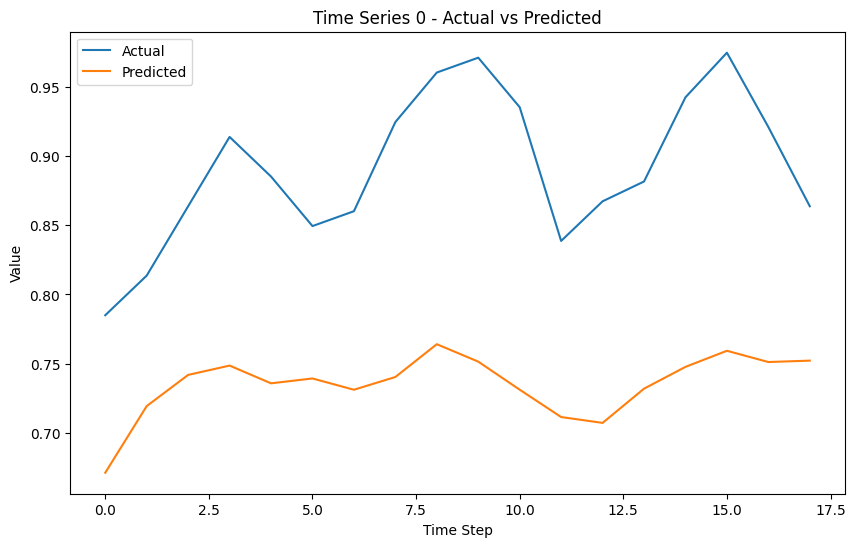

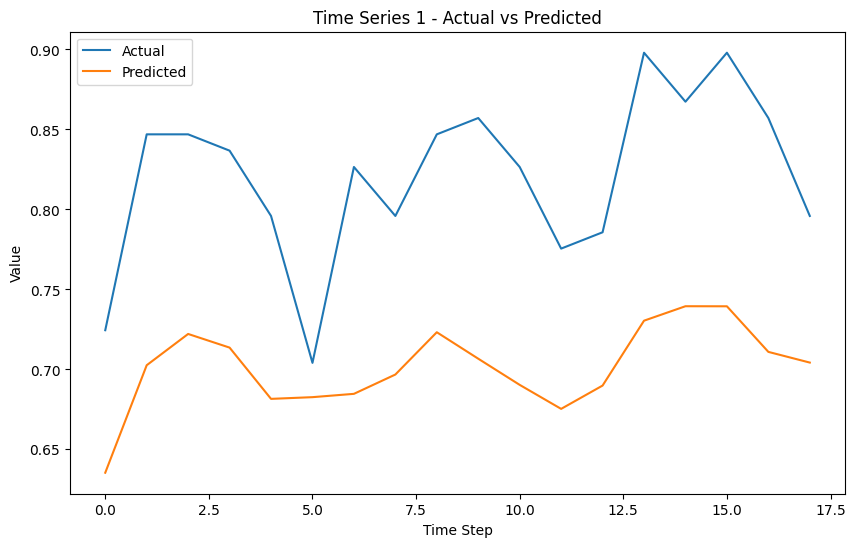

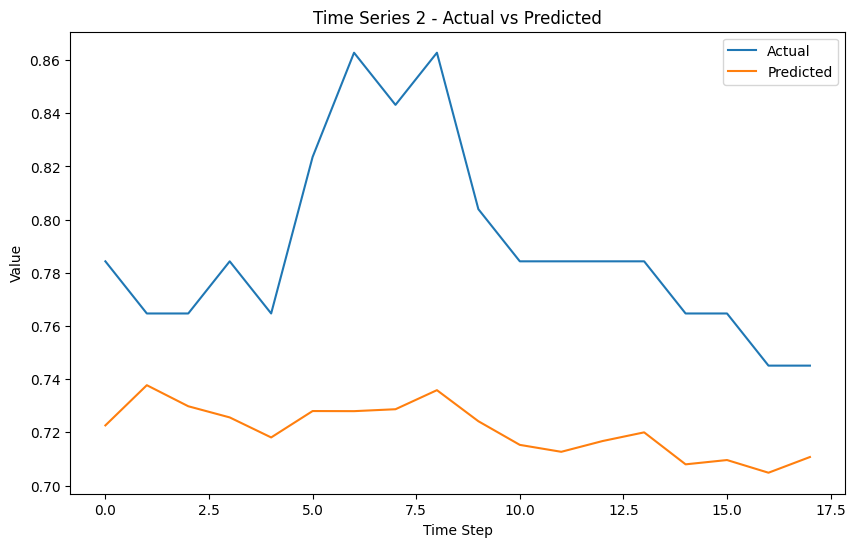

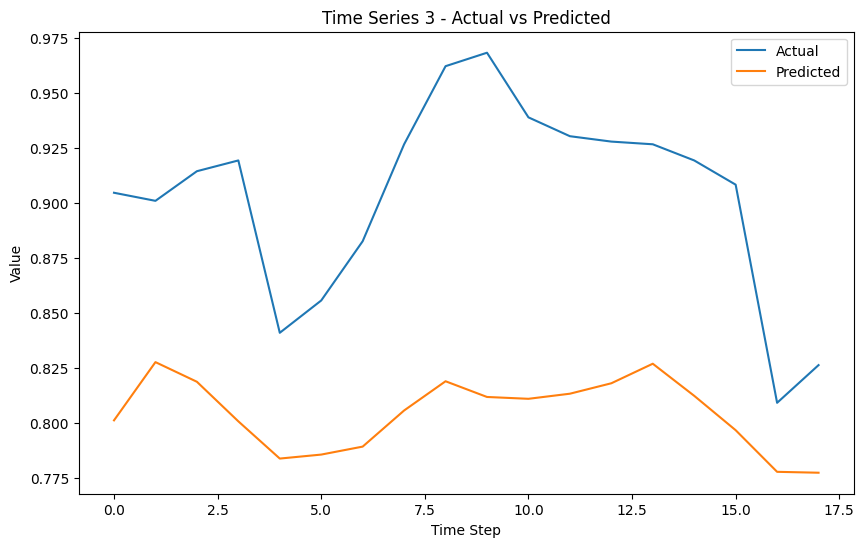

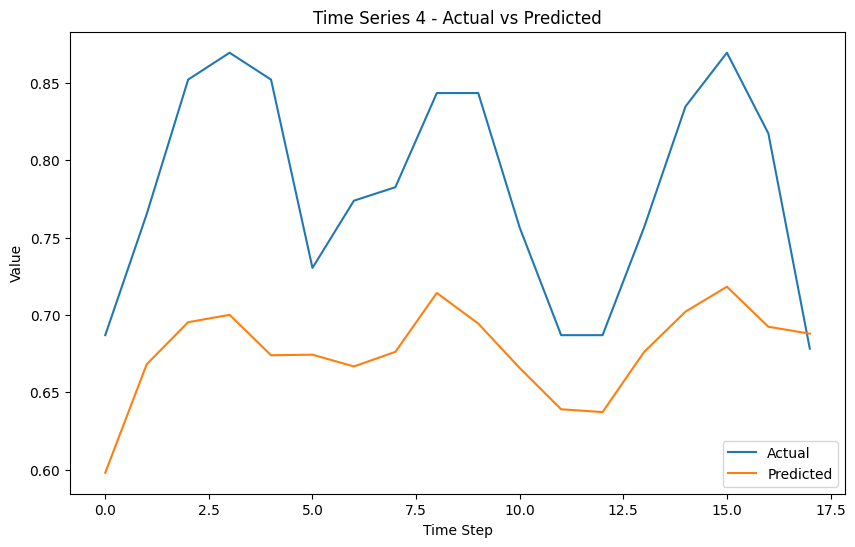

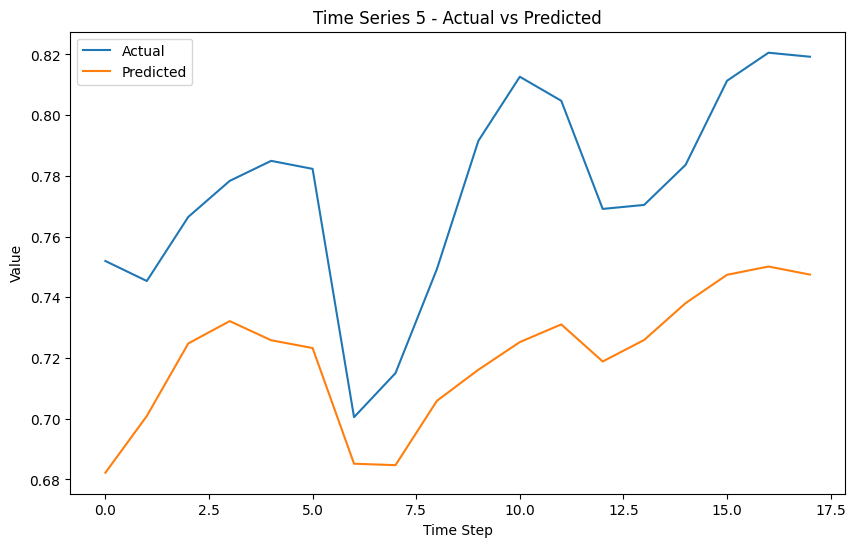

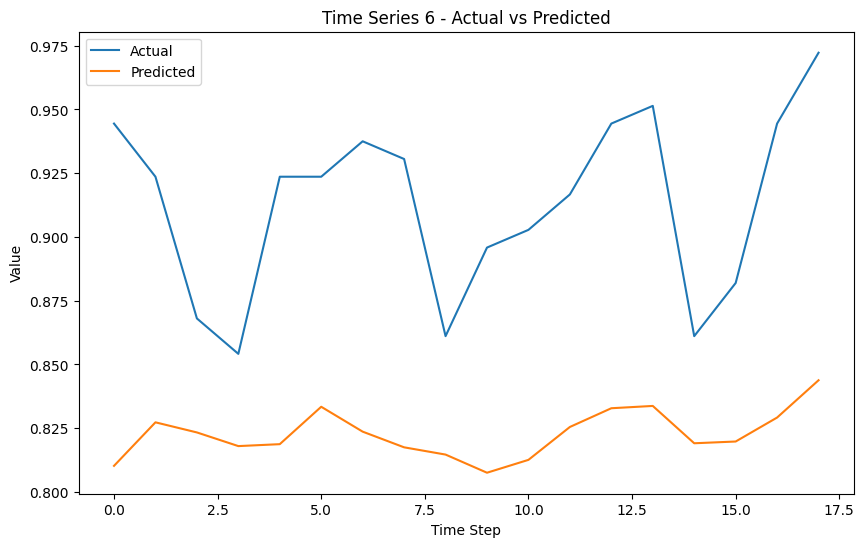

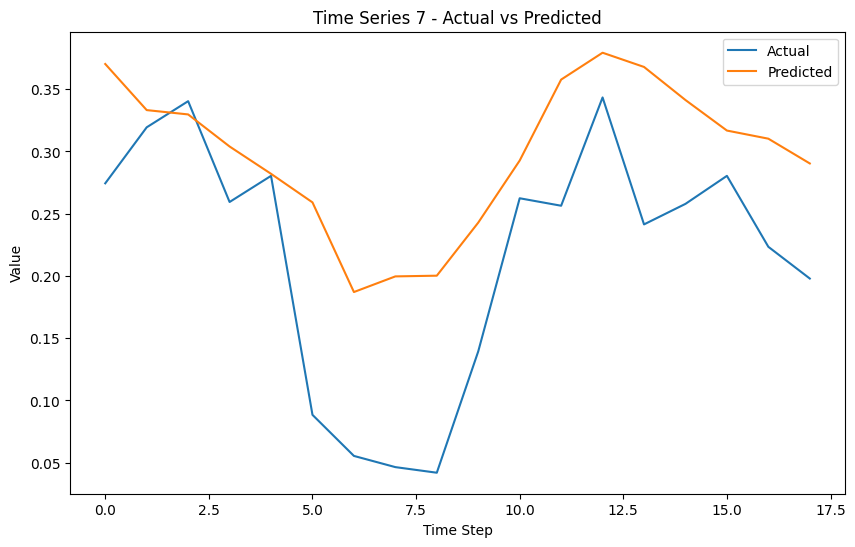

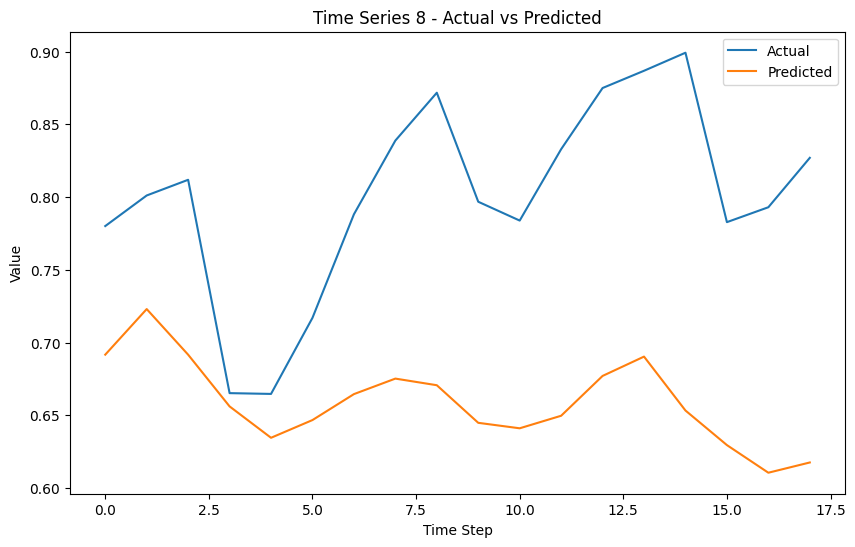

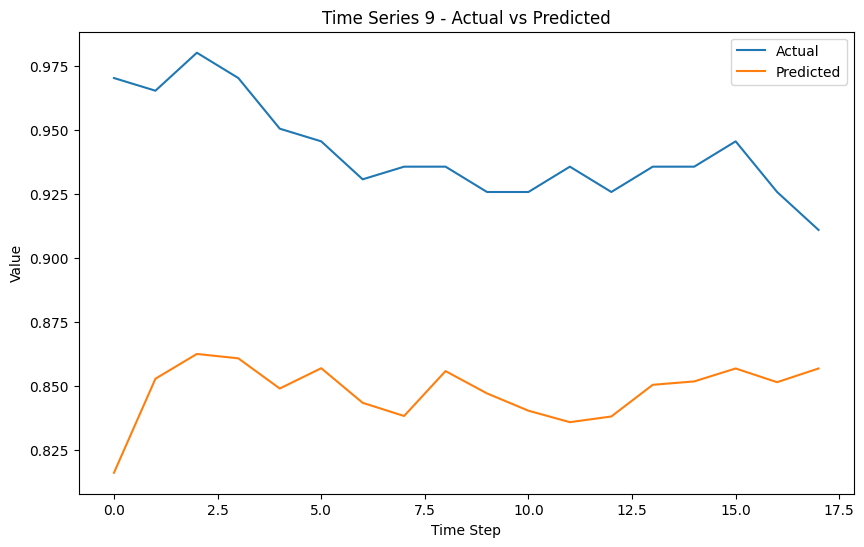

In [16]:
evaluate_model(predictions, test_labels)
for i in range(10):
    # Plot the first 5 predictions
    plot_predictions(predictions, test_labels, i)

In [7]:
evaluate_model(test_labels, predictions)

MAE: 0.12285280543770279
MSE: 0.02884109872673198
RMSE: 0.16982667260101394
MAPE: 36.090566663971344%


In [8]:
np.mean(np.abs((test_labels - predictions)))

0.12285280543770277